# Pytorch WorkFlow

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Creating Simple Dataset

In [2]:
# create params
weight= 0.7
bias = 0.3

# create data
x = torch.arange(0, 1, 0.02)

# create Formula
y = weight * x + bias

In [3]:
x[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

## Create train-test-split

In [4]:
# splitting our data
train_size = int(0.8 * len(x))

x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

## Create Function for plotting our data with predictions if founded

In [5]:
def plot_preds(train_data=x_train,
               train_labels=y_train,
               test_data=x_test,
               test_labels=y_test,
               preds=None):

  """
  Function for plotting train, test data and predictions if founded
  """

  plt.figure(figsize=(7, 7))

  # plotting our data
  plt.scatter(train_data, train_labels, c='r', label='train_data')
  plt.scatter(test_data, test_labels, c='g', label='test_data')

  if preds is not None :
    plt.scatter(test_data, preds, c='b', label='predictions')

  plt.legend()

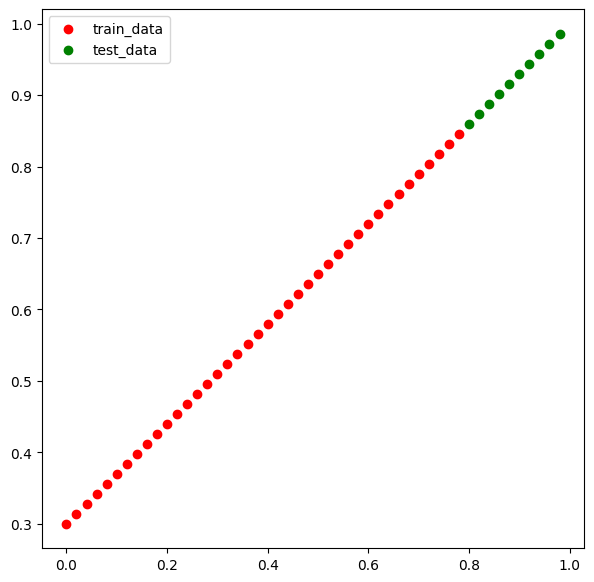

In [6]:
# check on function
plot_preds(train_data=x_train,
            train_labels=y_train,
            test_data=x_test,
            test_labels=y_test)

## Creating Our First Training Model

In [7]:
from torch import nn

In [8]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):
    def __init__(self) :
      super().__init__()
      # weigth
      self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                  requires_grad=True)
      # bias
      self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                  requires_grad=True)

    # Forward Function
    def forward(self, x:torch.Tensor) -> torch.Tensor :
      return self.weights * x + self.bias

In [9]:
# Check on contents of our pytorch model

# set random seed
torch.manual_seed(42)

# create instance of class
model_0 = LinearRegressionModel()

# check on params
model_0.state_dict(), list(model_0.parameters())

(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [10]:
# create predictions
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

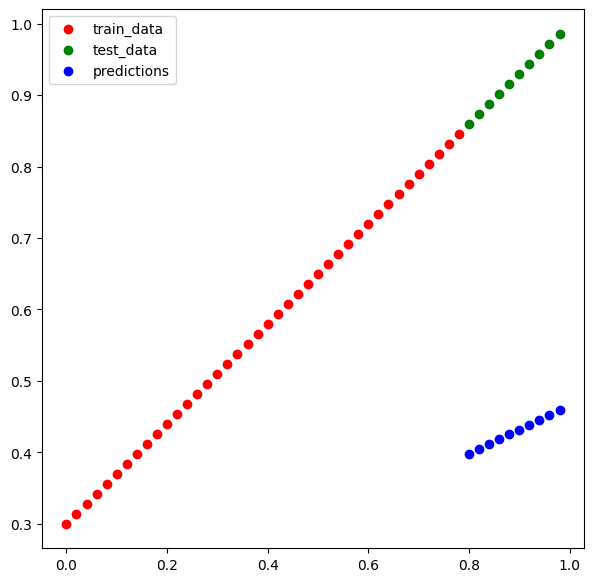

In [11]:
# plot predictions
plot_preds(preds=y_preds)

## Training Our First model

### Setup loss and optmizer

In [12]:
# setting up loss and optimizer

# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer (SGD)
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

### Creating train, test loop

In [13]:
# lists for plotting after training
epoch_count = []
train_loss_values = []
test_loss_values = []

# Creating train, test loop
epochs = 100

# 0. loop through epochs
for epoch in range(epochs) :
  # set model to train mode
  model_0.train()

  # 1. forward pass
  y_pred_train = model_0(x_train)

  # 2. calc train loss
  train_loss = loss_fn(y_pred_train, y_train)

  # 3. optim zero grad
  optimizer.zero_grad()

  # 4. backword for calc gradients
  train_loss.backward()

  # 5. optim step for updating params
  optimizer.step()

  #  Set model to test mode
  model_0.eval()

  # turn off gradients and get preds
  with torch.inference_mode():
    # 1. forward pass
    y_pred_test = model_0(x_test)

    # 2. calc test loss
    test_loss = loss_fn(y_pred_test, y_test)

    # print out what's happning ?
    if epoch % 10 == 0 :
      print(f"Epoch:{epoch} | train_loss:{train_loss} | test_loss:{test_loss}")
      print(f"Model Params : {model_0.state_dict()}")
      epoch_count.append(epoch)
      train_loss_values.append(train_loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

Epoch:0 | train_loss:0.31288138031959534 | test_loss:0.48106518387794495
Model Params : OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | train_loss:0.1976713240146637 | test_loss:0.3463551998138428
Model Params : OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | train_loss:0.08908725529909134 | test_loss:0.21729660034179688
Model Params : OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | train_loss:0.053148526698350906 | test_loss:0.14464017748832703
Model Params : OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | train_loss:0.04543796554207802 | test_loss:0.11360953003168106
Model Params : OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | train_loss:0.04167863354086876 | test_loss:0.09919948130846024
Model Params : OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | train_loss:0.038189

### plot loss curves

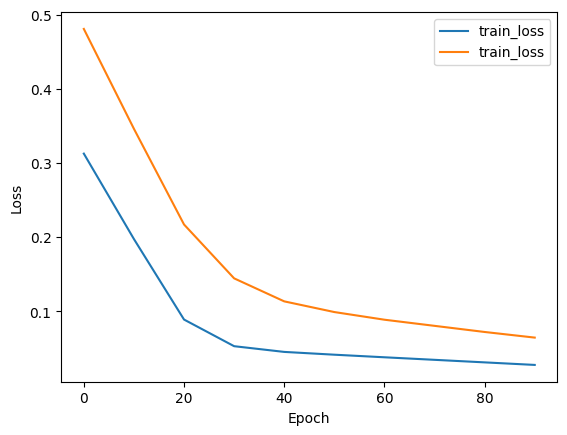

In [14]:
# plot loss curves
plt.plot(epoch_count, train_loss_values, label='train_loss')
plt.plot(epoch_count, test_loss_values, label='train_loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

### Make Some Predictions

In [15]:
# make Some predictions
model_0.eval()

with torch.inference_mode():
  y_predictions_model_0 = model_0(x_test)

In [16]:
y_predictions_model_0

tensor([0.8141, 0.8256, 0.8372, 0.8488, 0.8603, 0.8719, 0.8835, 0.8950, 0.9066,
        0.9182])

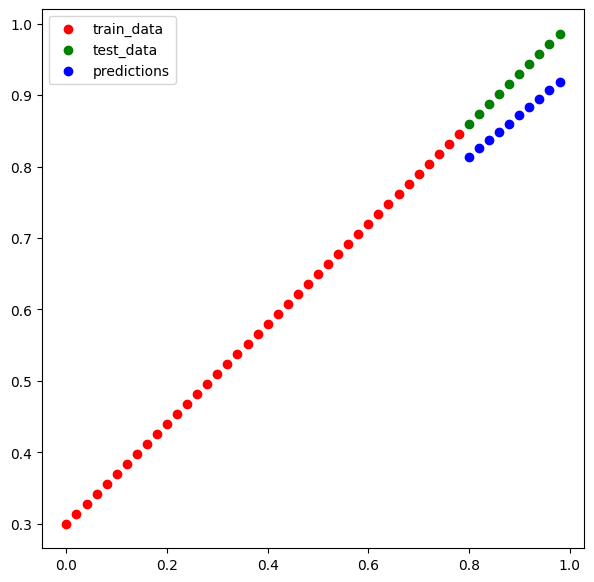

In [17]:
# plot preds
plot_preds(preds= y_predictions_model_0)

## Save and loading Our model

In [18]:
from pathlib import Path

def save_model(model , model_path, model_name):

  # 1. Create model dir
  MODEL_PATH = Path(model_path)
  MODEL_PATH.mkdir(parents=True, exist_ok=True)

  # 2. Create model save path
  MODEL_NAME = model_name
  MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

  # 3. Save model_dict
  torch.save(obj = model.state_dict(),
             f = MODEL_SAVE_PATH)

  print(f"Model saved in : {MODEL_SAVE_PATH}")

In [19]:
# saving model
save_model(model = model_0,
           model_path = 'models',
           model_name = '01_pytorch_workflow_model_0.pth')

Model saved in : models/01_pytorch_workflow_model_0.pth


In [20]:
# load our model
loaded_model_0 = LinearRegressionModel()

# load saved model
loaded_model_0.load_state_dict(torch.load(f='models/01_pytorch_workflow_model_0.pth'))

<All keys matched successfully>

In [21]:
# make some predictions with loaded model
loaded_model_0.eval()

with torch.inference_mode():
  y_predictions_loaded_model_0 = loaded_model_0(x_test)

In [22]:
# check if loaded and saved is equalled ?!
y_predictions_loaded_model_0 == y_predictions_model_0

tensor([True, True, True, True, True, True, True, True, True, True])

# Geting all of that Together

## 01. Create Our Data

In [47]:
# create params
weight= 0.7
bias = 0.3

# create data
x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)

# create Formula
y = weight * x + bias

y.shape, x.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [48]:
# splitting our data
train_size = int(0.8 * len(x))

x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

## 02. Creating model class

In [49]:
# Create linear regression model class

class LinearRegressionModelV2(nn.Module):
    def __init__(self) :
      super().__init__()

      # Create linear layer
      self.linear_layer = nn.Linear(in_features = 1,
                                    out_features = 1)

    # Forward Function
    def forward(self, x:torch.Tensor) -> torch.Tensor :
      return self.linear_layer(x)

In [50]:
# setup our device
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [51]:
# set manual seed
torch.manual_seed(42)

# create Instance from class
model_1 = LinearRegressionModelV2()

# check on params
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [52]:
# check model on device
next(model_1.parameters()).device

device(type='cpu')

In [53]:
# convert model on cuda
model_1.to(device)

# convert our data on cuda
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

next(model_1.parameters()).device, x_train.device, y_train.device, x_test.device, y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

## 03. Setup loss and optmizer

In [54]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer (SGD)
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

## 04. creat Train and Test Loop

In [56]:
# lists for plotting after training
epoch_count = []
train_loss_values = []
test_loss_values = []

# Creating train, test loop
epochs = 200

# 0. loop through epochs
for epoch in range(epochs) :
  # set model to train mode
  model_1.train()

  # 1. forward pass
  y_pred_train = model_1(x_train)

  # 2. calc train loss
  train_loss = loss_fn(y_pred_train, y_train)

  # 3. optim zero grad
  optimizer.zero_grad()

  # 4. backword for calc gradients
  train_loss.backward()

  # 5. optim step for updating params
  optimizer.step()

  #  Set model to test mode
  model_1.eval()

  # turn off gradients and get preds
  with torch.inference_mode():
    # 1. forward pass
    y_pred_test = model_1(x_test)

    # 2. calc test loss
    test_loss = loss_fn(y_pred_test, y_test)

    # print out what's happning ?
    if epoch % 10 == 0 :
      print(f"Epoch:{epoch} | train_loss:{train_loss} | test_loss:{test_loss}")
      print(f"Model Params : {model_0.state_dict()}")
      epoch_count.append(epoch)
      train_loss_values.append(train_loss.cpu().detach().numpy())
      test_loss_values.append(test_loss.cpu().detach().numpy())

Epoch:0 | train_loss:0.5436570048332214 | test_loss:0.560505211353302
Model Params : OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
Epoch:10 | train_loss:0.42844706773757935 | test_loss:0.42579540610313416
Model Params : OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
Epoch:20 | train_loss:0.31323719024658203 | test_loss:0.2910855710506439
Model Params : OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
Epoch:30 | train_loss:0.1980273425579071 | test_loss:0.15637575089931488
Model Params : OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
Epoch:40 | train_loss:0.0828174576163292 | test_loss:0.021665919572114944
Model Params : OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
Epoch:50 | train_loss:0.023356428369879723 | test_loss:0.04883447289466858
Model Params : OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
Epoch:60 | train_loss:0.019609849

## 5. Making Some Preds

In [57]:
# making some preds
model_1.eval()

with torch.inference_mode():
  y_preds_model_1 = model_1(x_test)

y_preds_model_1

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]], device='cuda:0')

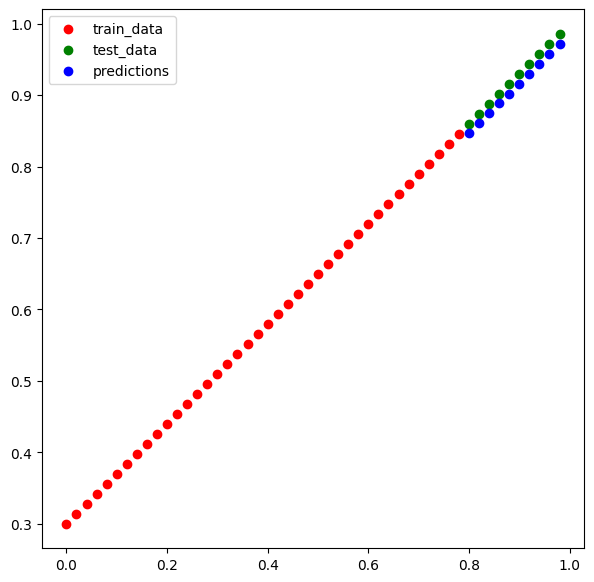

In [59]:
# plot preds
plot_preds(preds = y_preds_model_1.cpu())

6. Plot Loss Curves

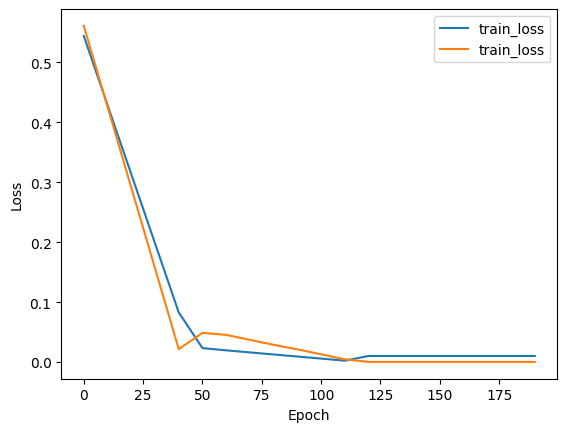

In [60]:
# plot loss curves
plt.plot(epoch_count, train_loss_values, label='train_loss')
plt.plot(epoch_count, test_loss_values, label='train_loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()